In [57]:
import pandas as pd
import numpy
import scipy.stats as sts
from scipy.optimize import curve_fit
import scipy.ndimage as snd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
df = pd.read_csv('/home/dprotter/Downloads/testing_fiji/output_from_macro.csv')

In [96]:
num_cells = len(df.columns) - 3

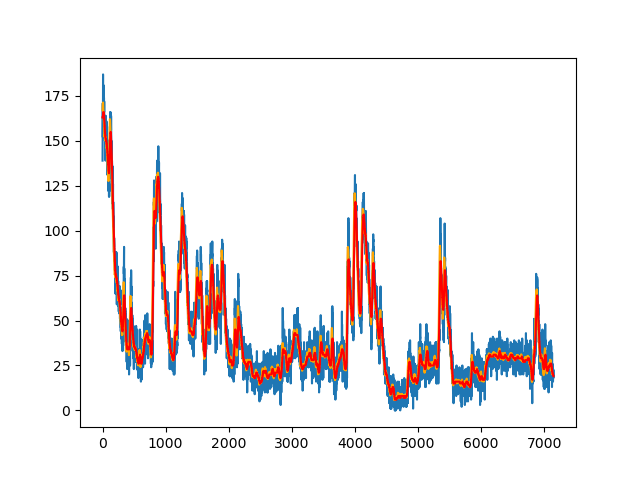

In [3]:

window = 20
def moving_average(x, w):
    """calculate moving average with window size w"""
    return np.convolve(x, np.ones(w), 'valid') / w
fig, ax = plt.subplots()
data = df['y0']
ax.plot(data)
ax.plot(moving_average(data, window), color  = 'orange')
gaus = snd.gaussian_filter1d(data, 10)
ax.plot(gaus, color = 'red')


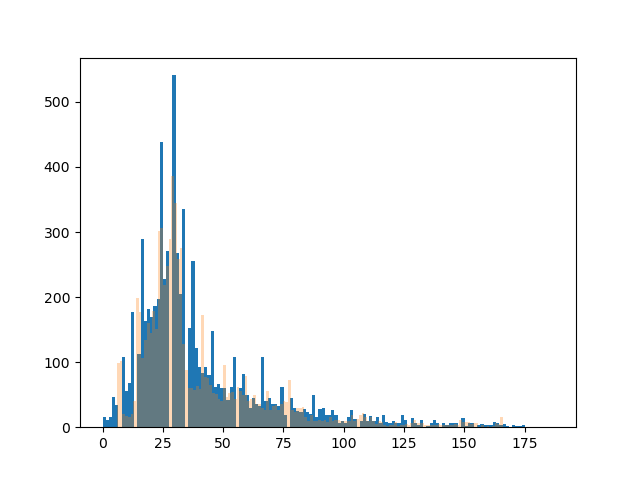

In [4]:
plt.figure()
_=plt.hist(data, bins = int(len(data)/50))
bins=plt.hist(gaus, bins = int(len(data)/50), alpha = 0.3)


In [5]:
bins[1].max()

166.0

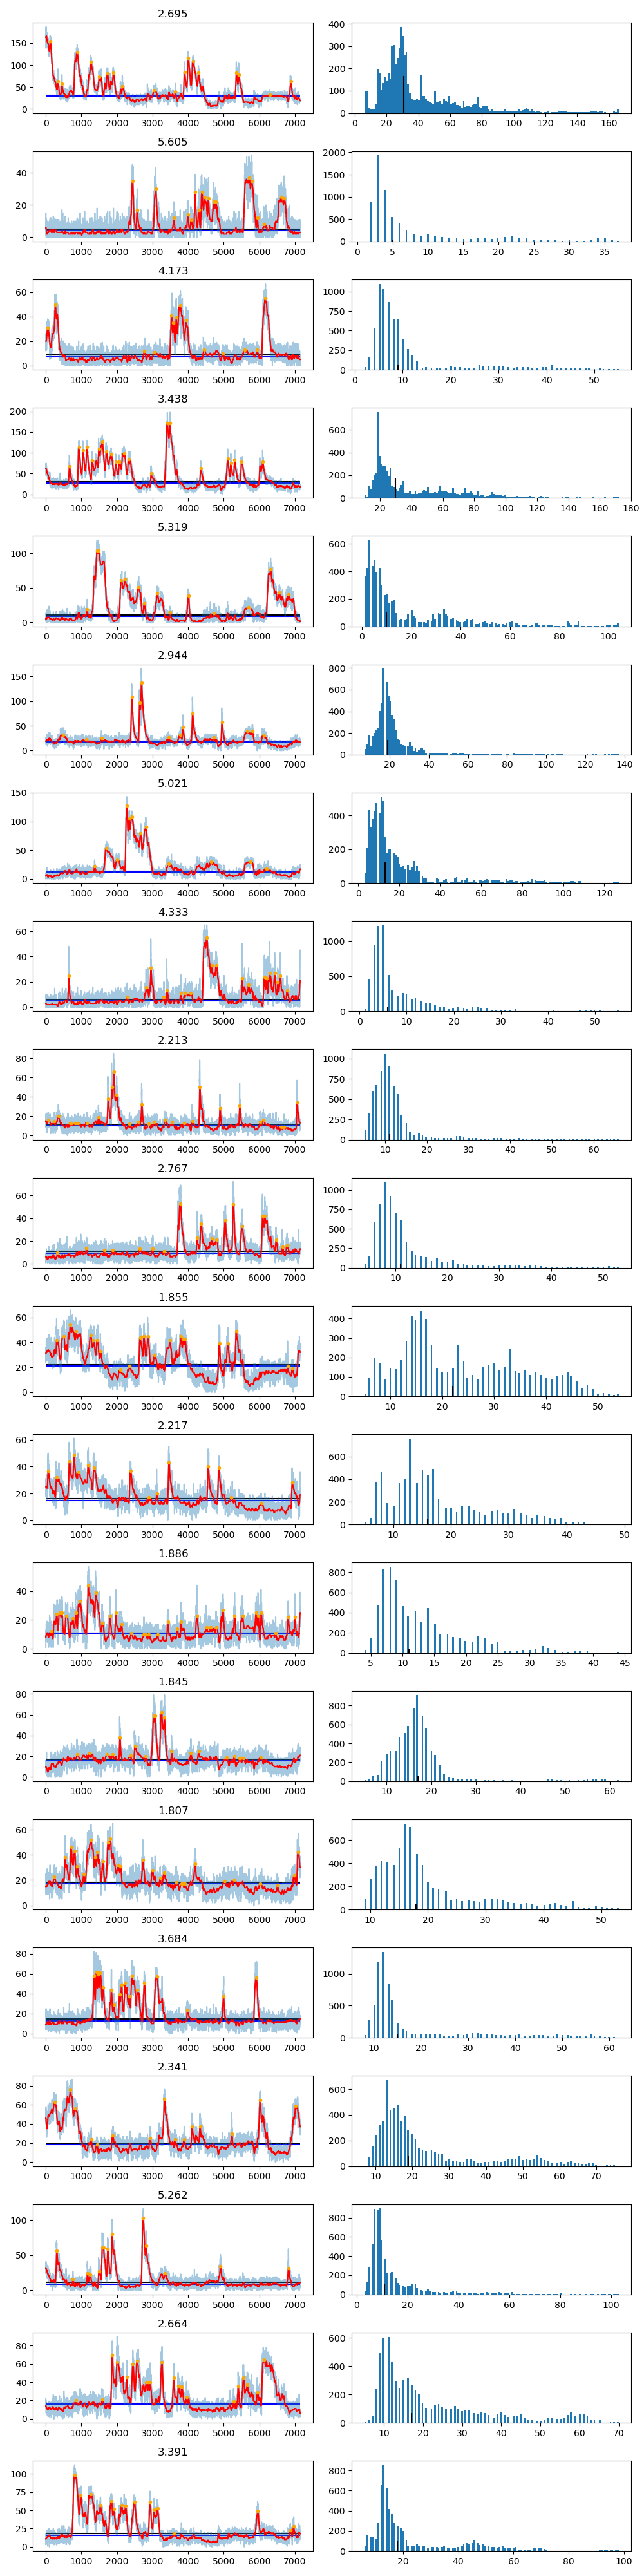

In [6]:
import scipy.signal as sig
fig, axs = plt.subplots(ncols=2, nrows = 20, figsize = (10, 40))
for i in range(20):
    data = df[f'y{i}']
    med = np.median(data)
    axs[i, 0].plot(data, alpha = 0.4)
    gaus = snd.gaussian_filter1d(data, 10)
    med_gaus = np.median(gaus)
    gaus_std = np.std(gaus)
    peaks = sig.find_peaks(gaus,prominence=gaus_std/2)
    axs[i, 0].plot(gaus, color = 'red')
    axs[i,0].hlines(y = med, xmin = 0, xmax = len(data), color = 'black')
    axs[i,0].hlines(y = med_gaus, xmin = 0, xmax = len(data), color = 'blue')
    axs[i,0].scatter(x = peaks[0], y = gaus[peaks[0]], color = 'orange', marker = '.',zorder = 3)
    
    mean_snr = np.mean(gaus[peaks[0]]/med_gaus)
    
    axs[i,0].set_title(np.round(mean_snr,3))
    
    bins = axs[i, 1].hist(gaus, bins = int(len(data)/50))
    
    axs[i,1].vlines(x = med, ymin = 0, ymax = bins[1].max(), color = 'black')
fig.tight_layout()

In [125]:
decay_curves.shape

(1000,)

<ipython-input-119-2d370e57d08a>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(ncols=2, nrows = 40, figsize = (10, 40))


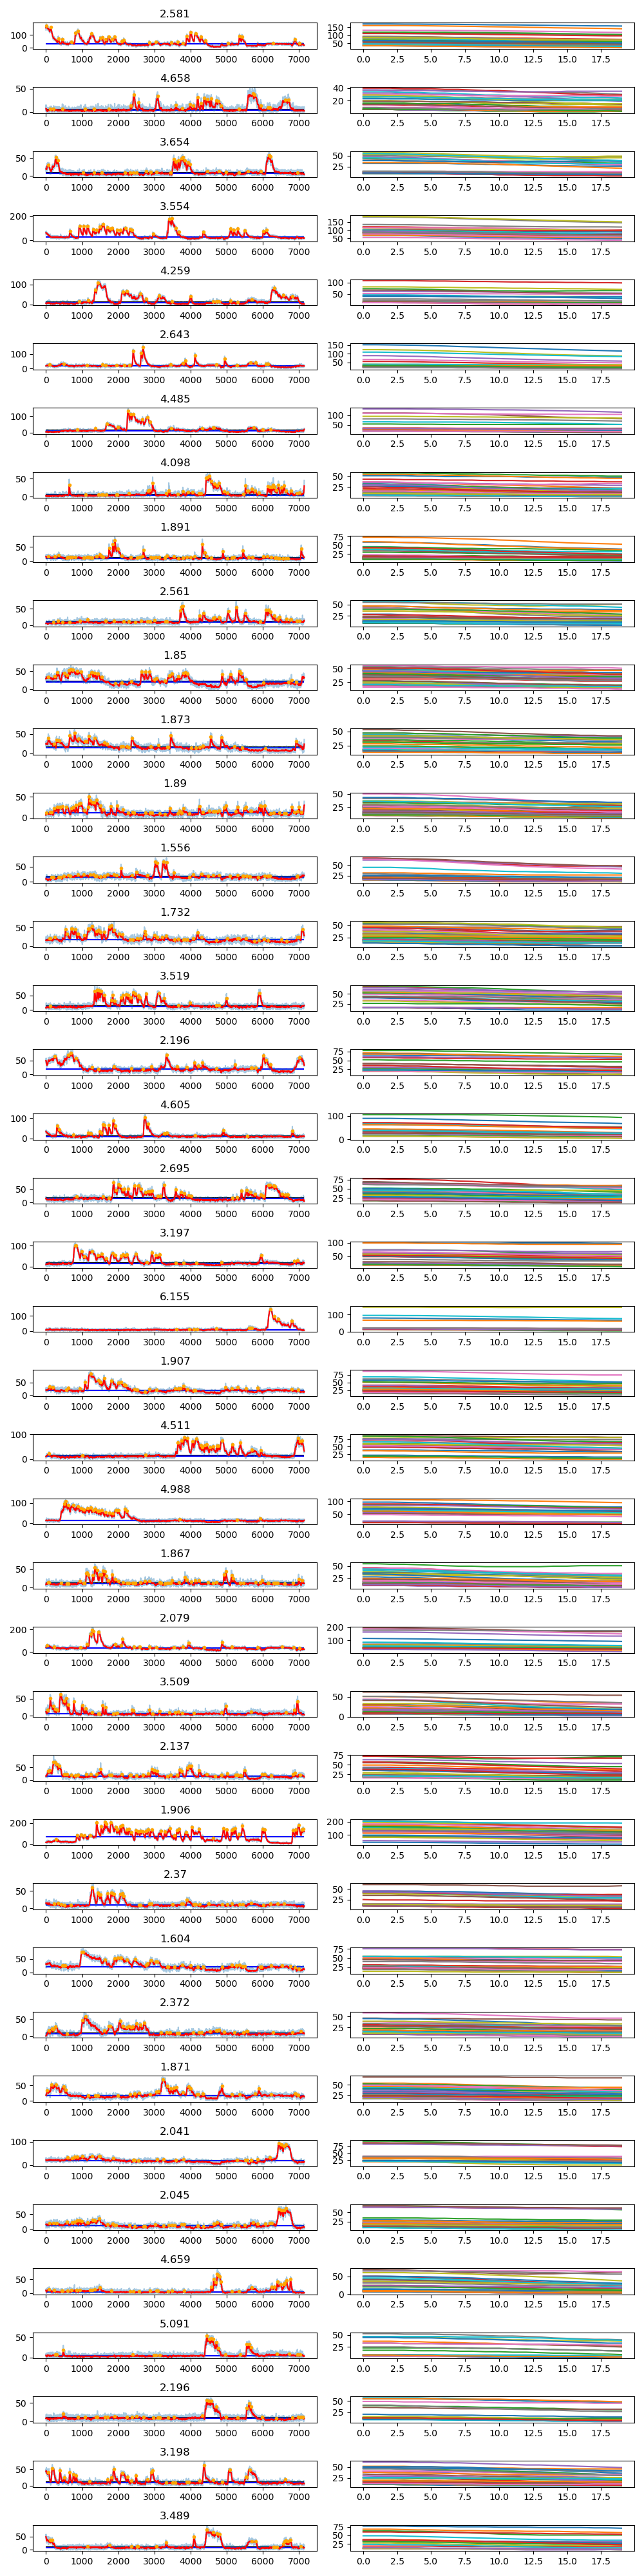

In [119]:
import scipy.signal as sig
fig, axs = plt.subplots(ncols=2, nrows = 40, figsize = (10, 40))

cells = {}
cell_peaks ={}

for i in range(num_cells):
    data = df[f'y{i}']
    med = np.median(data)
    axs[i, 0].plot(data, alpha = 0.4)
    gaus = snd.gaussian_filter1d(data, 5)
    med_gaus = np.median(gaus)
    gaus_std = np.std(gaus)
    peaks = sig.find_peaks(gaus,prominence=gaus_std/2)
    axs[i, 0].plot(gaus, color = 'red')
    axs[i,0].hlines(y = med, xmin = 0, xmax = len(data), color = 'black')
    axs[i,0].hlines(y = med_gaus, xmin = 0, xmax = len(data), color = 'blue')
    axs[i,0].scatter(x = peaks[0], y = gaus[peaks[0]], color = 'orange', marker = '.',zorder = 3)
    
    mean_snr = np.mean(gaus[peaks[0]]/med_gaus)
    
    axs[i,0].set_title(np.round(mean_snr,3))
    max_peak = np.max(gaus[peaks[0]])
    decay_curves = np.zeros((len(peaks[0]), 40))
    
    drop_list = []
    for j, peak in enumerate(peaks[0]):
        if peak+40 > len(gaus):
            drop_list += [j]
        else:
            decay_curves[j,:] = gaus[peak:peak+40]
        
        
        axs[i,1].plot(gaus[peak:peak+20])
    decay_curves = np.delete(decay_curves, drop_list)
    peaks_out = ()
    peaks_out = np.delete(peaks[0], drop_list)
    peaks_out_dict = {}
    for key in peaks[1].keys():
        peaks_out_dict[key] = np.delete(peaks[1][key], drop_list)
    cells[i] = decay_curves  
    cell_peaks[i] = (peaks_out, peaks_out_dict)
fig.tight_layout()

In [112]:
peaks[1]

{'prominences': array([ 29.,  48.,  44.,  30.,  23., 124.,  66., 192.,  44.,  92.,  46.,
         34.,  51.,  88.,  42.,  53.,  25.,  71.,  28.,  47.,  25.,  31.,
        102., 102.,  63.,  75.,  46., 113.,  34.,  33., 105.,  74., 130.,
         50.,  31., 113.,  82.,  45.,  48., 108.,  29., 151., 119.,  34.,
         63.,  48.,  98.,  28.,  23.]),
 'left_bases': array([  10,  631,  631, 1045, 1163,  631, 1507,  631, 1656, 1771, 1889,
        1965, 2040, 2040, 2218, 2269, 2344, 2449, 2530, 2596, 2648, 2745,
        2449, 2449, 2884, 3090, 3249, 2449, 3532, 3594, 3594, 3792, 3792,
        4120, 4411, 4411, 4979, 5089, 5089, 4411, 5310, 4411, 5620, 6023,
        6707, 6707, 6707, 7057, 7057]),
 'right_bases': array([ 627,  933, 1153, 1153, 1322, 1504, 1564, 6705, 1769, 6705, 2036,
        2036, 2091, 6705, 2267, 2445, 2445, 2744, 2596, 2744, 2744, 2801,
        3085, 3085, 3085, 3241, 3315, 3788, 3591, 3656, 3788, 4006, 4403,
        4403, 4789, 5084, 5084, 5161, 5212, 5308, 5357, 6705, 

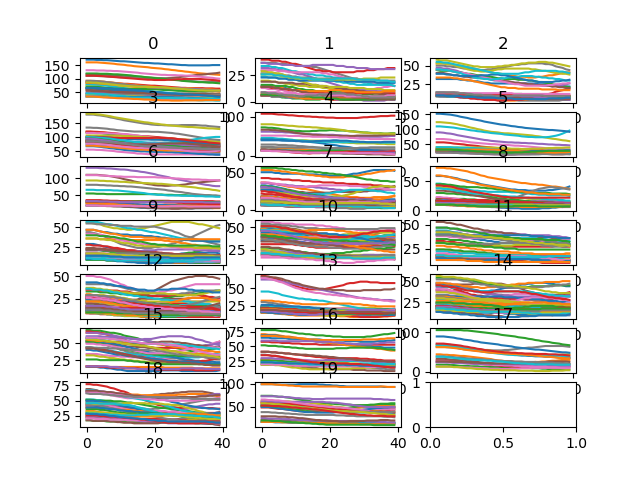

In [8]:
fig, axs = plt.subplots(ncols = 3, nrows=int(np.ceil(len(cells)/3)))
keys = cells.keys()
for cell, ax in zip(keys, axs.ravel()):
    for decay in cells[cell]:
        ax.plot(decay)
        ax.set_title(cell)


In [15]:
def half_life(t , initial, t_one_half):  
    return initial * np.power(0.5, (t/t_one_half))

In [13]:
half_life(np.asarray([0,1,2,3]), 173, 5)

array([173.        , 150.60524745, 131.109483  , 114.13743428])

In [55]:
def plot_decay(params, peak_loc, axes_obj, window = 20, color = 'green', alpha = 0.8):
    initial_height, t_half = params
    xs = np.asarray([x for x in range(window)])
    ys = half_life(xs, initial_height, t_half)
    plt_xs = xs + peak_loc
    axes_obj.plot(plt_xs, ys, color = color, alpha = alpha)
    return axes_obj
    

In [123]:
cells[0]

array([171., 171., 171., ...,  22.,  22.,  22.])

<ipython-input-120-3a23c42ecbd7>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(ncols=2, nrows = 10, figsize = (10, 40))


IndexError: invalid index to scalar variable.

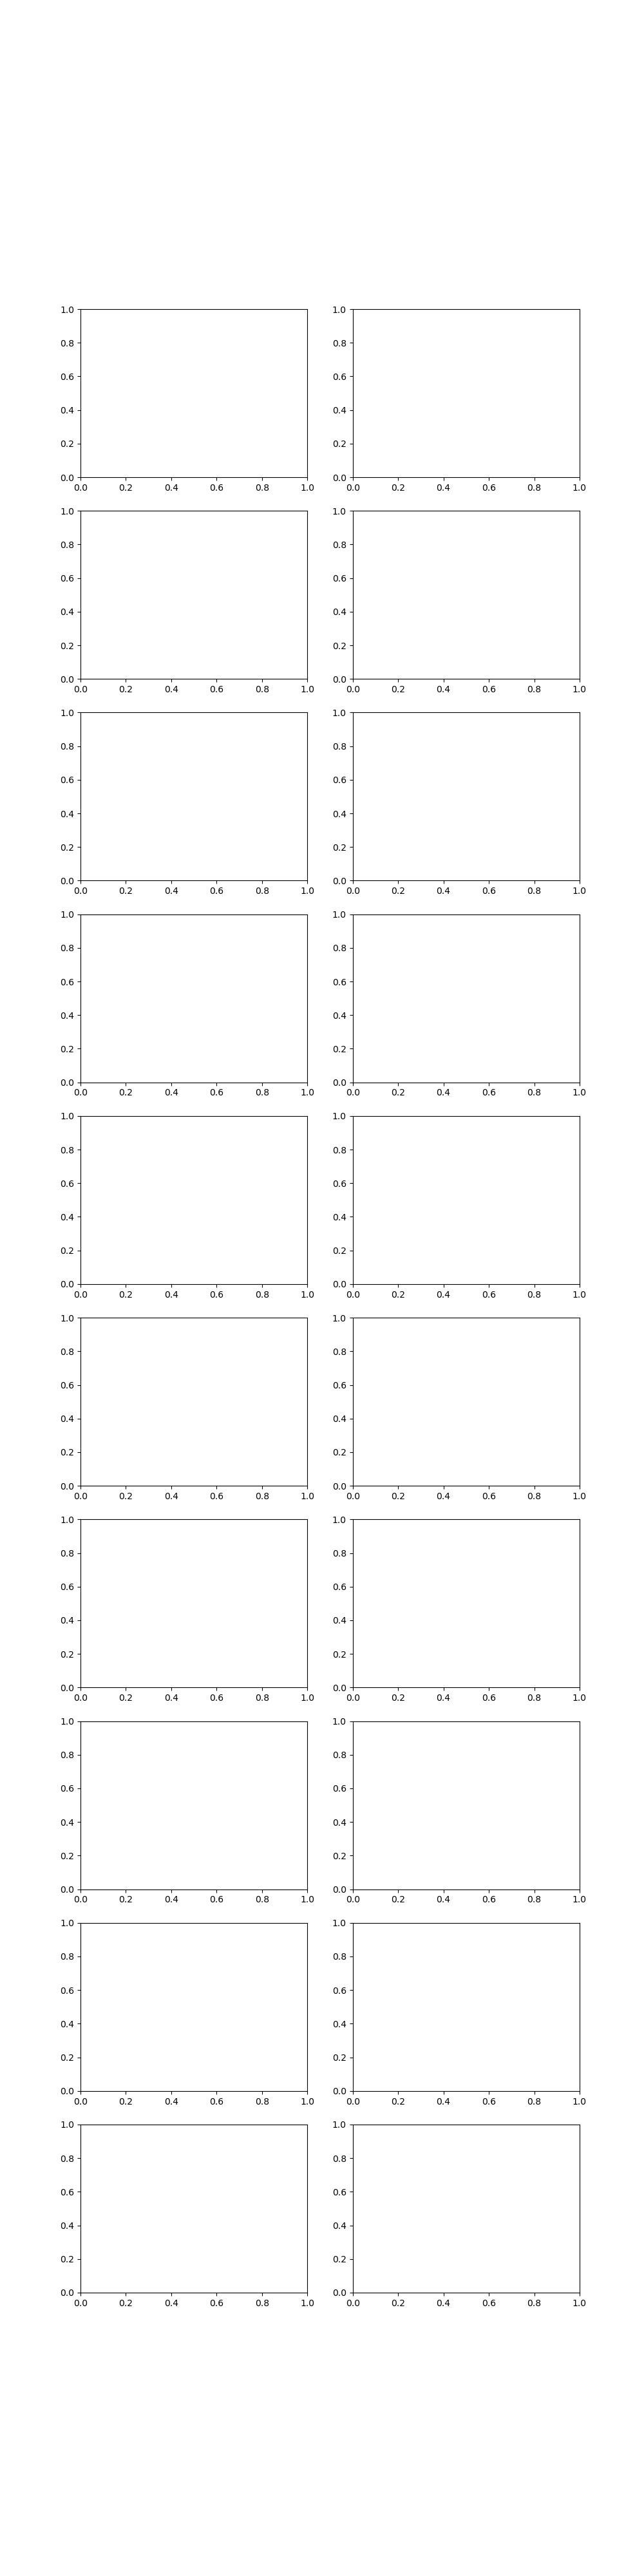

In [120]:

fig, axs = plt.subplots(ncols=2, nrows = 10, figsize = (10, 40))
fit_window = 30
cell_params = {}
for cell, ax in zip(cells.keys(), axs.ravel()):

    

    params = np.zeros((len(cells[cell]),2))
    xdata = [x+1 for  x in range(fit_window)]
    for i, decay in enumerate(cells[cell]):
        #initial guesses [initial height, t_half]
        
        p0  = [decay[0], 1]
        popt, pcov = curve_fit(half_life, xdata, cells[cell][i][:fit_window], p0 = p0)
        params[i,:] = popt
    cell_params[cell] = params
    # residuals = np.zeros((len(cells[cell]), len(cells[cell][0])))


    data = df[f'y{cell}']
    med = np.median(data)
    ax.plot(data, alpha = 0.4)
    gaus = snd.gaussian_filter1d(data, 5)
    med_gaus = np.median(gaus)
    gaus_std = np.std(gaus)
    peaks = sig.find_peaks(gaus,prominence=gaus_std/2)
    ax.plot(gaus, color = 'red')
    ax.scatter(x = cell_peaks[cell][0], y = gaus[cell_peaks[cell][0]], color = 'darkgreen', marker = '.',zorder = 3)

    for param_pair, peak_loc in zip(params, cell_peaks[cell][0]):
        ax = plot_decay(param_pair, peak_loc, ax, window = 60)
        ax = plot_decay(param_pair, peak_loc, ax, window = fit_window, color = 'orange', alpha = 1)


In [101]:
cell_peaks[0][0][1]

127

In [103]:
cell_params[0][1]

array([ 1.46566666e+02, -3.56460546e+08])

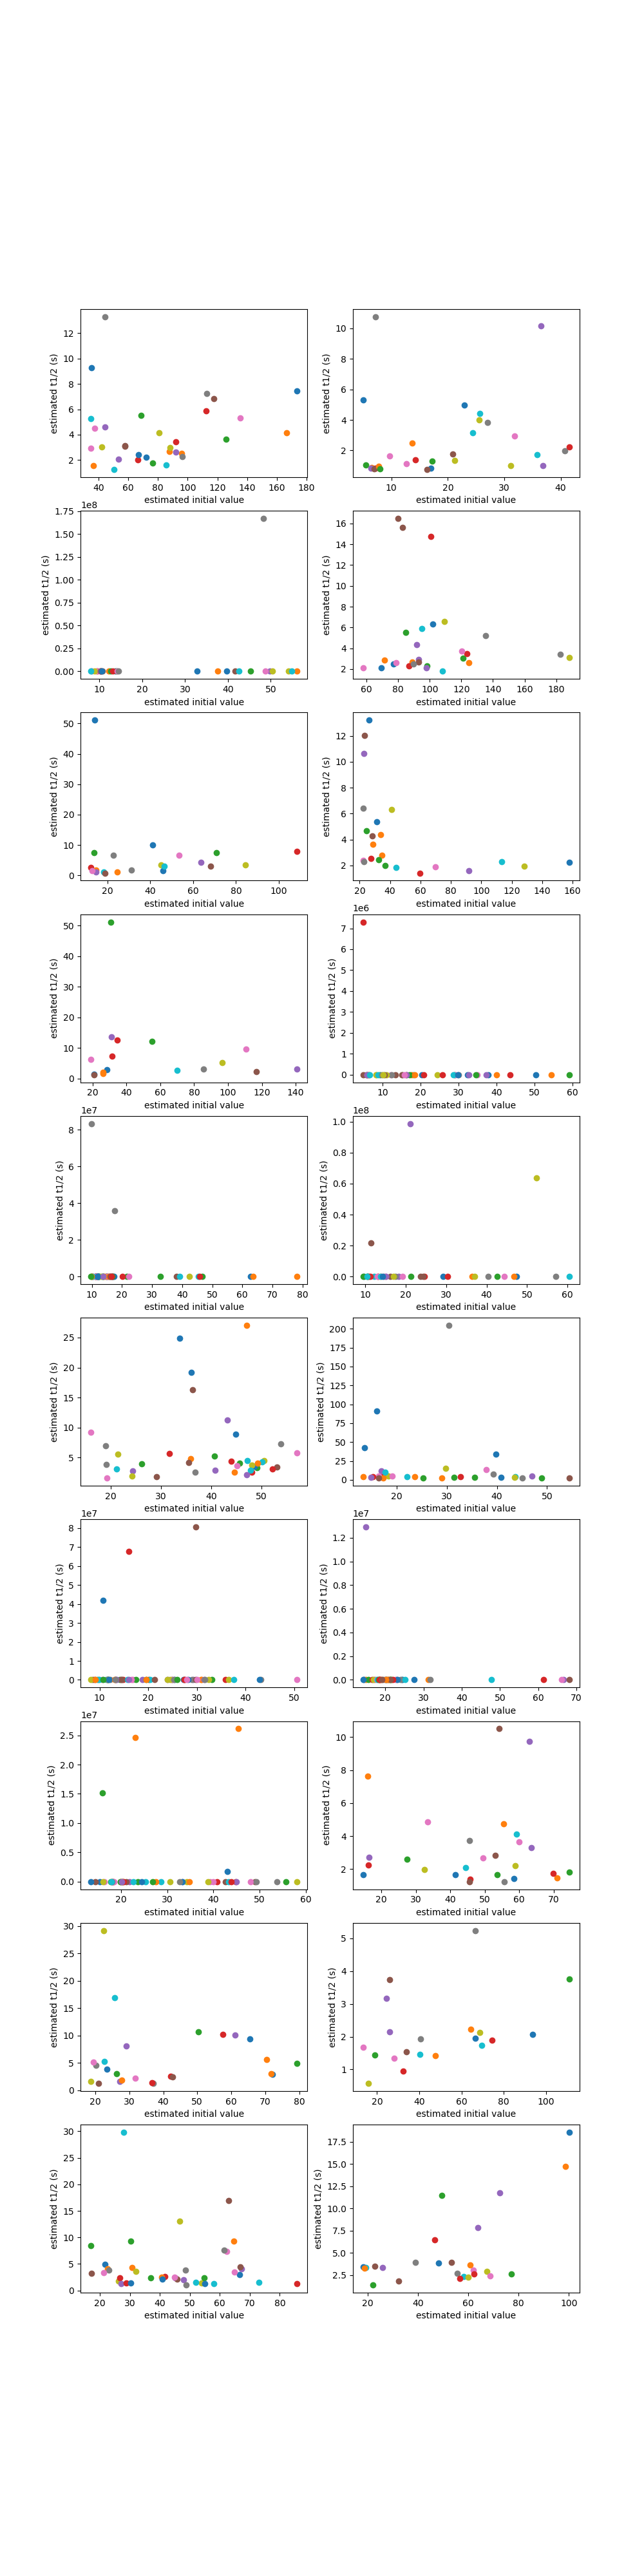

In [107]:
fig, axs = plt.subplots(ncols=2, nrows = 10, figsize = (10, 40))
fit_window = 20
for cell, ax in zip(cells.keys(), axs.ravel()):
    for param_pair in cell_params[cell]:
        if not param_pair[1] == 0:
            ax.scatter(param_pair[0], param_pair[1]/20)
            ax.set_xlabel('estimated initial value')
            ax.set_ylabel('estimated t1/2 (s)')


In [78]:
param_arr[np.logical_and(param_arr[:,1] > 0, param_arr[:,1] < 15)]

array([], shape=(0, 2), dtype=float64)

In [88]:
param_arr[:,1]

array([ 1.48534414e+02, -7.12921093e+09,  3.55048673e+01,  4.02902582e+01,
        9.25617770e+01,  1.36347890e+02,  1.06241450e+02,  1.44645959e+02,
        8.29785667e+01,  3.16583126e+01,  4.82140933e+01,  5.37130661e+01,
        1.10298359e+02,  6.89101187e+01,  4.09339121e+01,  6.15463428e+01,
        9.01148053e+01,  2.65895261e+02,  6.02906469e+01, -1.27362055e+09,
        1.85263498e+02,  5.06393490e+01,  7.30554682e+01,  1.17593853e+02,
        5.27097682e+01, -7.57683498e+09,  5.84374547e+01,  4.58496158e+01,
        5.99057377e+01,  1.05371337e+02,  4.40642540e+01,  3.10911607e+01])

In [90]:
param_slice

array([[16.34116244, 14.95299546]])

KeyError: 20

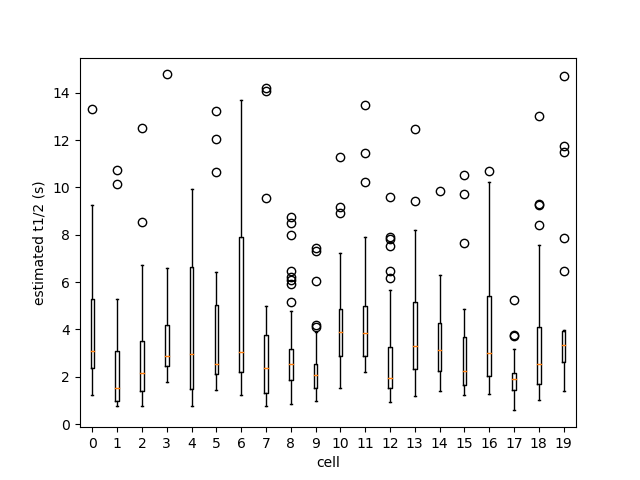

In [108]:
fig, ax = plt.subplots()
fit_window = 20
for cell in cells.keys():
    param_arr = cell_params[cell]
    param_arr[:,1] = param_arr[:,1]/20
    param_slice = param_arr[np.logical_and(param_arr[:,1] > 0, param_arr[:,1] < 15)]
    if len(param_slice>0):
        ax.boxplot(x = param_slice[:,1], positions=[cell])
        ax.set_xlabel('cell')
        ax.set_ylabel('estimated t1/2 (s)')


In [ ]:
fig, axs = plt.subplots(ncols=2, nrows = 20, figsize = (10, 40))

cells = {}

for i in range(0):
    data = df[f'y{i}']
    med = np.median(data)
    axs[i, 0].plot(data, alpha = 0.4)
    gaus = snd.gaussian_filter1d(data, 5)
    med_gaus = np.median(gaus)
    gaus_std = np.std(gaus)
    peaks = sig.find_peaks(gaus,prominence=gaus_std/2)
    axs[i, 0].plot(gaus, color = 'red')
    axs[i,0].hlines(y = med, xmin = 0, xmax = len(data), color = 'black')
    axs[i,0].hlines(y = med_gaus, xmin = 0, xmax = len(data), color = 'blue')
    axs[i,0].scatter(x = peaks[0], y = gaus[peaks[0]], color = 'orange', marker = '.',zorder = 3)
    
    mean_snr = np.mean(gaus[peaks[0]]/med_gaus)
    
    axs[i,0].set_title(np.round(mean_snr,3))
    max_peak = np.max(gaus[peaks[0]])
    decay_curves = np.zeros((len(peaks[0]), 40))
    for j, peak in enumerate(peaks[0]):
        decay_curves[j,:] = gaus[peak:peak+40]
        axs[i,1].plot(gaus[peak:peak+20])
    cells[i] = decay_curves  
fig.tight_layout()

<ipython-input-90-6bf32a6cca04>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


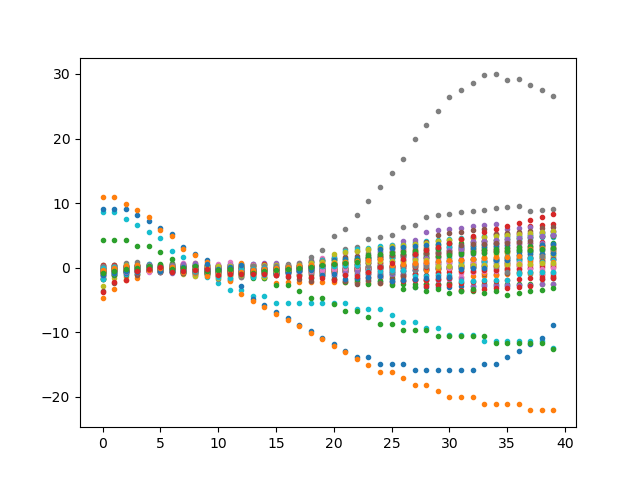

In [90]:
fig, ax = plt.subplots()
_ = [ax.plot(residual, '.') for residual in residuals]

In [128]:
df = pd.read_csv('/home/dprotter/testmount/Yurika/Meadow NAc Implants Cohort 5/2024_10_02/13_52_04/My_V4_Miniscope/ROI_traces.csv')


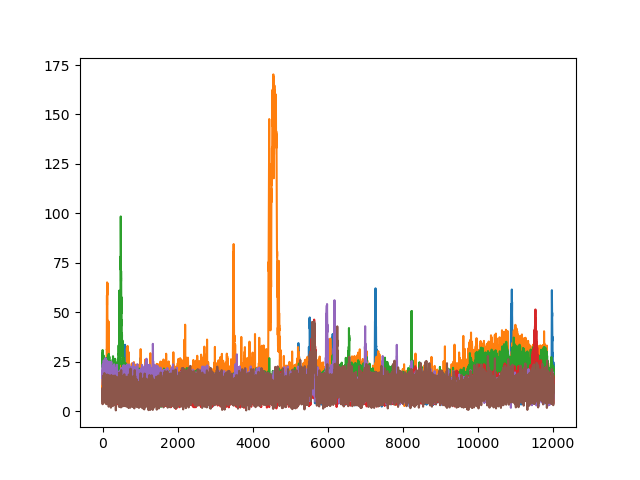

In [133]:
%matplotlib notebook
plt.figure()
df['y0'].plot()
df['y1'].plot()
df['y2'].plot()
df['y3'].plot()
df['y5'].plot()
df['y6'].plot()